# Data from Simultaneous age-dependent and age-independent sexual selection in the lekking black grouse (Lyrurus tetrix)

The data visualized in this notebook is related to the article:

Kervinen M, Lebigre C, Soulsbury CD (2016) Simultaneous age-dependent and age-independent sexual selection in the lekking black grouse (Lyrurus tetrix). Journal of Animal Ecology 85(3): 715–725. https://doi.org/10.1111/1365-2656.12496


Distributed under CC0 1.0 Universal licence at:


Kervinen M, Lebigre C, Soulsbury CD (2016) Data from: Simultaneous age-dependent and age-independent sexual selection in the lekking black grouse (Lyrurus tetrix). Dryad Digital Repository. https://doi.org/10.5061/dryad.2jj6q

In [1]:
import numpy as np
import altair as alt
import pandas as pd
from IPython.display import display
alt.renderers.enable('notebook')
pd.options.display.max_colwidth = 0
dfExpl = pd.read_excel('./data/data_for_Kervinen_et_al_JAE-2014-00782.R3.xlsx', sheet_name='Variable explanations')
display(dfExpl)
df = pd.read_excel('./data/data_for_Kervinen_et_al_JAE-2014-00782.R3.xlsx',sheet_name='Data')
print("First five lines of the dataset:")
display(df.head( 5))
#df.describe()


,Variable,Explanation
0,id,Individual identity.
1,age,Age of the individual in (calendar) years.
2,year,Year of observation.
3,hatched,Year of hatching of the individual.
4,age1stlek,Age at which the individual first time established a territory on the study lek.
5,lifespan,Age of the individual at its last observation.
6,site,Study site denetod as letters from A to E.
7,mass,Body mass (g) of the individual measured during winter (January-March)
8,lyre,Lyre length (mm) of the individual measured during winter (January-March).
9,blue,Blue chroma reflectance (proportion of the total reflection) of the breast feathers during the winter (January-March).


First five lines of the dataset:


,ID,id,age,year,hatched,age1stlek,lifespan,site,mass,lyre,...,AMS,LMS,S_MS,S_mass,S_lyre,S_blue,S_eyec,S_attend,S_fight,S_dist
0,D154280,M1,1,2002,2001,2,2,A,1160.0,191.0,...,0,1,0.00,-0.831528,-0.733668,-0.848101,-1.464037,-1.108108,NaN,NaN
1,D154280,M1,2,2003,2001,2,2,A,NaN,NaN,...,1,1,0.76,NaN,NaN,NaN,NaN,-0.101523,-0.617284,1.367663
2,D154288,M2,1,2002,2001,2,2,A,1230.0,189.0,...,0,1,0.00,0.140694,-0.834171,-1.797468,-0.862477,-1.459459,NaN,NaN
3,D154288,M2,2,2003,2001,2,2,A,1270.0,222.0,...,1,1,0.76,0.837363,1.023148,1.040724,1.487338,0.609137,-0.987654,1.753045
4,D154299,M3,1,2003,2002,2,3,B,1200.0,170.0,...,0,3,0.00,-0.124176,-1.384259,1.493213,0.022480,-1.421320,NaN,NaN


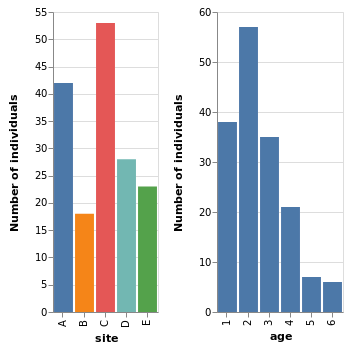

In [2]:
#Visualization of leks (called sites) population and their age ( which should match the number of datapoints for the individual)

interval = alt.selection_single(fields=['site'])
base_chart = alt.Chart(df[['id','age','site']].drop_duplicates('id',keep='last'))
ch = base_chart.mark_bar().encode(
    x = 'site:O',
    y = alt.Y('count()',title='Number of individuals'),
    color = alt.condition(interval,'site', alt.value('lightgray'),legend=None),
    tooltip = 'count()'
).properties(
    selection=interval
)

ch2 = base_chart.mark_bar().encode(
    x = 'age:N',
    y = alt.Y('count()',title='Number of individuals'),
    tooltip = 'count()'
).transform_filter(
    interval
)
ch | ch2

# The histograms below are interactive, you can click on the bars on the left to see just the age histogram of
# that particular site. Hover over a bar to visualize its exact value.

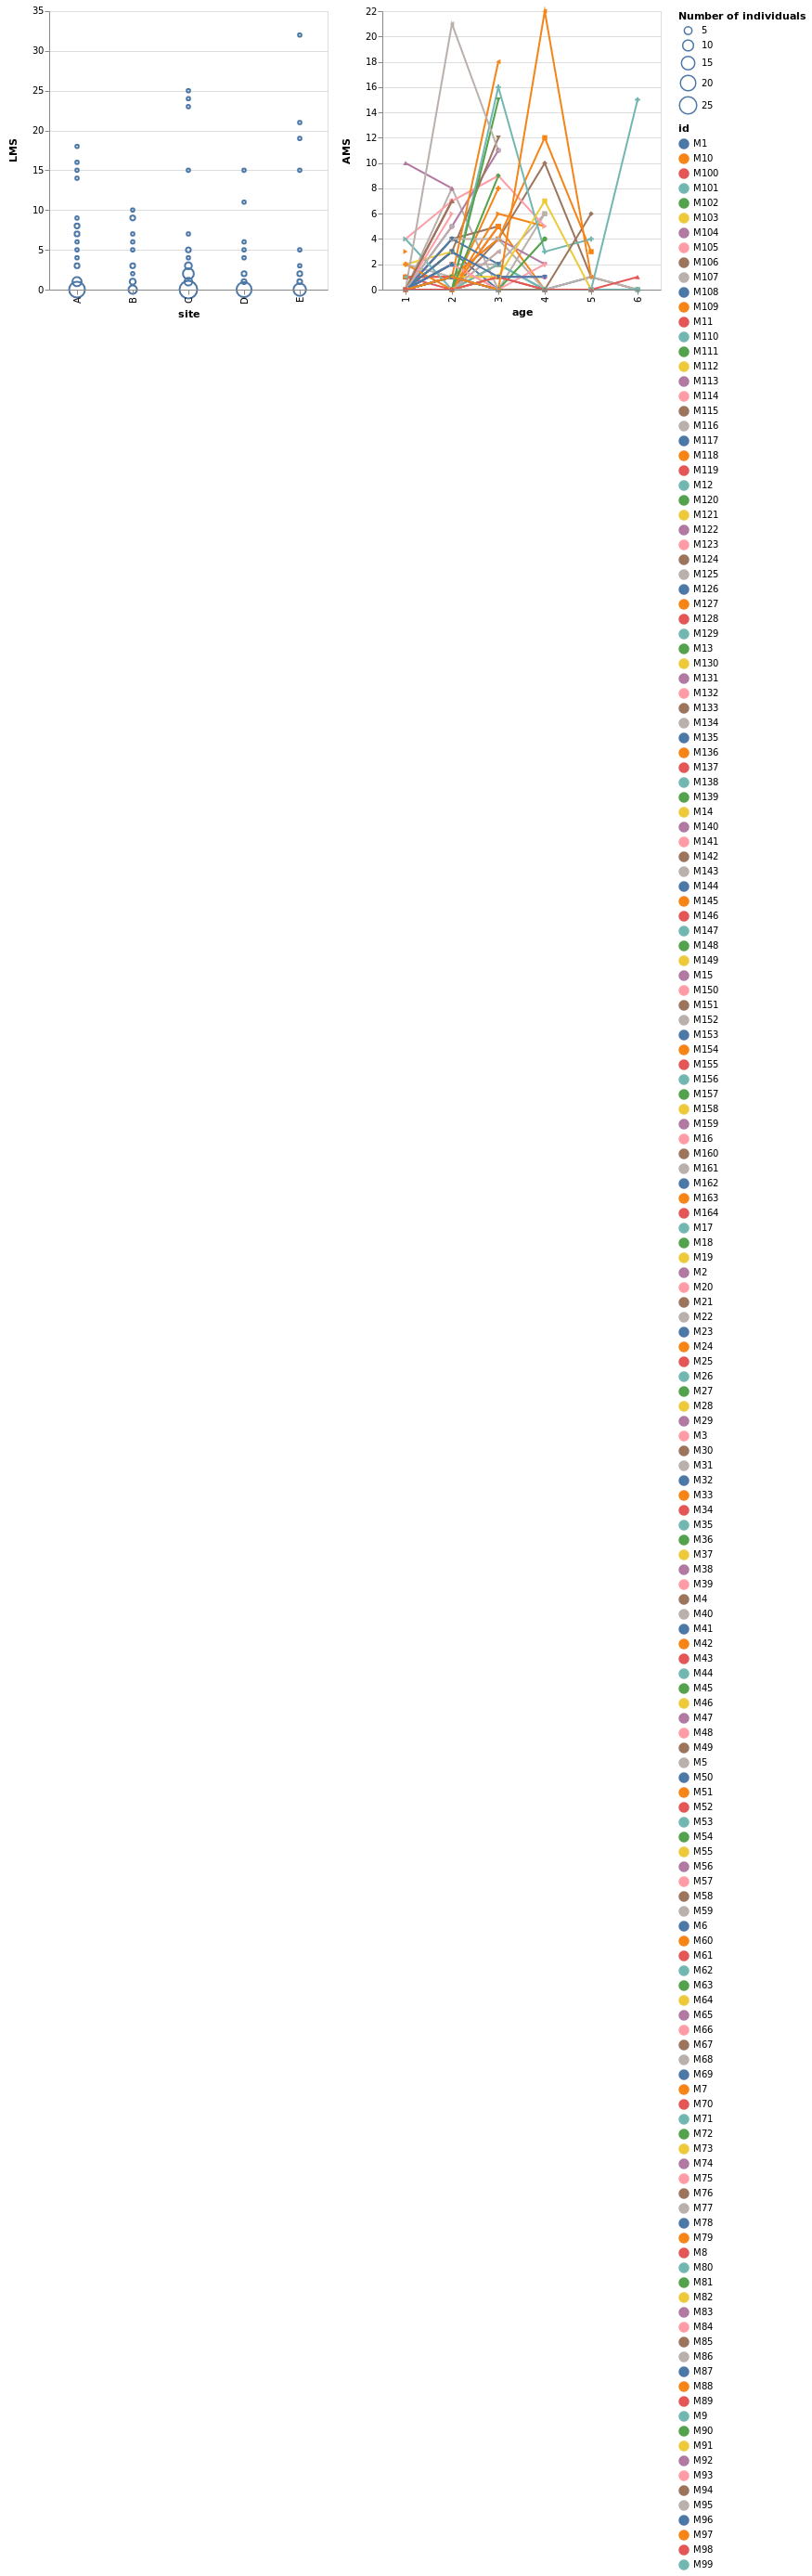

In [3]:
#Visualization of individuals performance divided by lek. 

base = alt.Chart(df[['LMS','AMS','id','site','age']])

lek_sel = alt.selection_interval(encodings=['x','y'])
ch1 = base.mark_point().encode(
    x = 'site',
    y = alt.Y('LMS', type='quantitative'),
    size = alt.Size('distinct(id)',title='Number of individuals'),
    tooltip = alt.Tooltip('distinct(id)')
).properties(
    height = 300,
    width = 300,
    selection = lek_sel
)
ch2 = base.mark_line().encode(
    x = 'age:N',
    y = 'AMS',
    color = 'id',
    shape = alt.Shape('id',legend=None)
).transform_filter(
    lek_sel
).properties(
    height = 300,
    width = 300)
ch1 | ch2

#The plot is interactive. Create a box (by click and drag) on the left plot and drag it around to visualize
#annual performances.

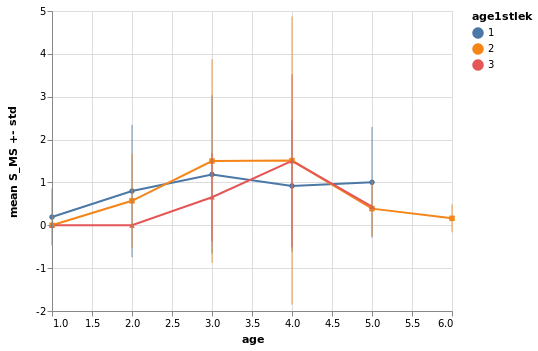

In [4]:
#Visualziation of mean performances vs age grouped by age of first lek attendance
import matplotlib.pyplot as plt

sol = df[['age1stlek','age','S_MS']].groupby(['age1stlek','age']).agg(['mean','std'])['S_MS'].reset_index().dropna()
#sol = res['S_MS'].reset_index().dropna()
base = alt.Chart(sol)
points = base.mark_line().encode(
    x = 'age',
    y = alt.Y('mean',title=r"mean S_MS +- std"),
    color = 'age1stlek:N',
    shape = alt.Shape('age1stlek', legend=None))
errors = base.mark_rule(opacity = 0.8).encode(
    x="age",
    y=alt.Y("ymin:Q"),
    y2=alt.Y2("ymax:Q"),
    color = 'age1stlek:N'
).transform_calculate(
    ymin="datum.mean-datum.std",
    ymax="datum.mean+datum.std"
)
points+errors

In [6]:
alt.Chart(df[['site','S_MS','S_dist','id','age']]).mark_line().encode(
    x = 'age',
    y = 'mean(S_dist)',
    color='site',
    tooltip = 'count(S_dist)')
dist_vs_age = df[['S_dist','age']].dropna()
import scipy.stats as stats
stats.pearsonr(dist_vs_age['S_dist'],dist_vs_age['age'])

(-0.2944936804282149, 1.279643498204943e-07)

In [ ]:
df[['id','age','dist','age1stlek']].drop_duplicates('id',keep='first')